# Noise and Fidelity in Quantum Computing

In quantum computing, **noise** and **fidelity** are critical concepts that affect the performance and reliability of quantum systems.

## Noise

1. **Definition**: 
   - Noise in quantum computing refers to any unwanted interactions or errors that occur in a quantum system, affecting the quantum states or the operations performed on them.

2. **Sources of Noise**:
   - **Decoherence**: The process by which quantum information is lost to the environment, causing the system to lose its quantum properties.
   - **Gate Errors**: Imperfections in the implementation of quantum gates, leading to inaccuracies in quantum operations.
   - **Measurement Errors**: Inaccuracies in reading the state of a qubit, leading to incorrect results.

3. **Impact**: 
   - Noise can degrade the performance of quantum algorithms by altering the intended quantum states, causing errors in computation, and reducing the overall reliability of the quantum system.

4. **Types of Noise**:
   - **Depolarizing Noise**: A type of noise where a qubit's state is replaced with a completely mixed state with a certain probability.
   - **Amplitude Damping**: A noise process where energy is lost from the quantum system, typically affecting the probability amplitudes.
   - **Phase Damping**: A noise process that causes dephasing, altering the relative phase between the components of a quantum state.

5. **Mitigation**: 
   - Quantum error correction and noise mitigation techniques are developed to reduce the impact of noise and improve the fidelity of quantum computations.

## Fidelity

1. **Definition**: 
   - Fidelity is a measure of how closely a quantum state or operation matches an ideal or reference state or operation. It quantifies the accuracy of quantum operations and the preservation of quantum information.

2. **Measurement**: 
   - Fidelity is typically calculated as the overlap between the ideal quantum state and the actual quantum state produced by a noisy operation.

3. **Importance**:
   - High fidelity indicates that a quantum system or operation closely approximates the desired outcome, making it reliable for quantum computation.
   - Fidelity is crucial for evaluating the performance of quantum devices and algorithms, as it provides a benchmark for how well they preserve quantum information.

4. **Applications**:
   - Fidelity is used to assess the effectiveness of quantum gates, circuits, and algorithms.
   - It helps in diagnosing and improving quantum systems by identifying sources of error and optimizing operations to enhance performance.

5. **Relation to Noise**: 
   - Fidelity is inversely related to noise; as noise increases, fidelity typically decreases. Understanding and mitigating noise is essential for improving fidelity in quantum computations.

## Importance of Noise Simulation

1. **Predicting Performance**: 
   - Noise simulation allows researchers to predict how quantum circuits will perform under realistic conditions. By understanding potential sources of error, researchers can better design and test quantum algorithms.

2. **Developing Error Correction**: 
   - Simulating noise helps in the development and testing of error correction protocols, which are essential for maintaining the integrity of quantum information in noisy environments.

3. **Optimizing Quantum Systems**:
   - Noise simulations enable the optimization of quantum systems by allowing researchers to identify weak points in the circuit or system design that are susceptible to noise.

4. **Benchmarking and Comparison**: 
   - Simulations provide a benchmark for comparing different quantum devices and algorithms, helping to determine which configurations are more robust against noise.

5. **Advancing Quantum Technology**: 
   - Understanding the effects of noise through simulation is critical for advancing quantum technology from theoretical models to practical applications, ensuring the development of scalable, reliable quantum computers.

In summary, noise is an inherent challenge in quantum computing that disrupts quantum states, while fidelity serves as a crucial metric for evaluating the accuracy and reliability of quantum operations in the presence of noise. Simulating noise is essential for understanding, mitigating, and ultimately overcoming these challenges to build practical and robust quantum systems.


In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cirq
from cirq.contrib.svg import SVGCircuit

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range (2**num_qubits)]

plt.rcParams.update({'font.size': 8})

## Part 1: Noisy Simulations

**Creating Qubits and Circuit :**

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


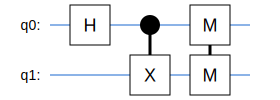

In [2]:
qubits = cirq.NamedQubit.range(2, prefix='q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))

circuit.append(cirq.measure(qubits))

display(SVGCircuit(circuit))

### 1.1: Adding general noises

- Simulating noise by adding it generally to the circuit using  `.with_noise(...)` method

#### Question 1.1.1 :

- Simulate this circuit with 5% chance of depolarizing noise


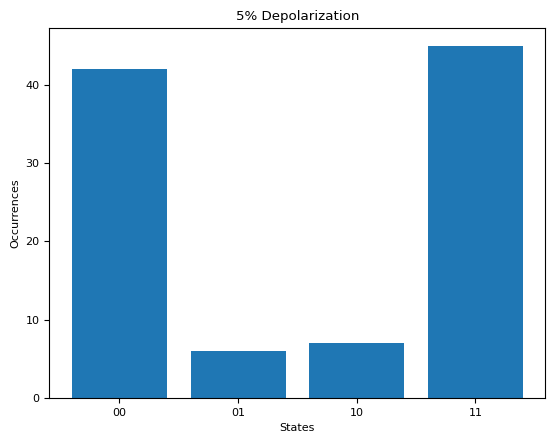

In [3]:
noise = cirq.depolarize(0.05)                                       # Defining a noise model 

simulator = cirq.Simulator()                                        # Initializing the Cirq simulator

result = simulator.run(circuit.with_noise(noise), repetitions=100)   # Running the circuit with the noise model


hist = cirq.plot_state_histogram(result, plt.subplot(), title = '5% Depolarization', xlabel='States', ylabel='Occurrences', tick_label=binary_labels(2))

plt.show()

### Conclusion After Simulating the Circuit with Noise

After simulating the quantum circuit with a depolarizing noise model, we observe the following:

1. **Effect on Superposition and Entanglement**:
   - In the absence of noise, the Hadamard and CNOT gates create a superposition and entangled state of the qubits.
   - The 5% depolarizing noise introduces random errors, leading to a mixture of states rather than the pure states expected in an ideal scenario.

2. **Impact on Measurement Outcomes**:
   - The histogram of measurement outcomes shows increased variability compared to the ideal case.
   - Probabilities for certain quantum states (e.g., $|00\rangle$ or $|11\rangle$) are reduced, while non-zero probabilities appear for states that ideally should not occur.

### 1.2: Appending Noise to a specific moment

#### Question 1.2.1:

- Simulate the circuit with a 100% chance of depolarizing noise on just q0 before applying H-Gate

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


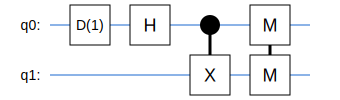

In [4]:
noise = cirq.depolarize(1.0)                                       # Defining a noise model 

# Creating Qubits and circuit

qubits = cirq.NamedQubit.range(2, prefix='q')
circuit = cirq.Circuit()


circuit.append(noise.on_each(qubits[0]))
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))

circuit.append(cirq.measure(qubits))

display(SVGCircuit(circuit))

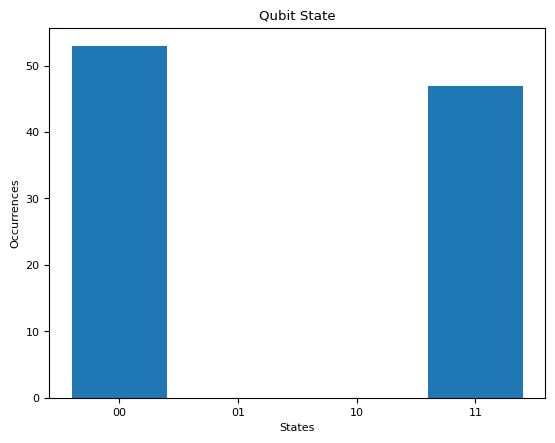

In [5]:
# Simulating noise 


simulator = cirq.Simulator()                               

result = simulator.run(circuit, repetitions=100)   # Running the circuit with the noise model


hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit State', xlabel='States', ylabel='Occurrences', tick_label=binary_labels(2))

plt.show()

### Impact of 100% Depolarizing Noise Before Hadamard Gate

When applying 100% depolarizing noise to qubit `q0` before the Hadamard gate, the state of `q0` becomes maximally mixed. This means that:

- **Maximally Mixed State**: The density matrix of `q0` is:
  $$
  \rho = \frac{1}{2} \begin{pmatrix}
  1 & 0 \\
  0 & 1
  \end{pmatrix}
  $$
  This indicates equal probabilities for measuring |0⟩ or |1⟩.

- **Effect of Hadamard Gate**: After the depolarizing noise, the Hadamard gate will transform this maximally mixed state into a state resembling |−⟩, which is a specific superposition state:
  $$
  |−⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)
  $$

- **Entanglement**: Despite the depolarizing noise, the entanglement between `q0` and `q1` still persists. However, the specific measurement outcomes might shift. For example:
  - The histogram will likely reflect this change in the distribution of measurement results but will still show evidence of entanglement.



## Part 2: Noise characterization with Swap Test

### 2.1: Calculating Fidelity with Swap Test

### Question :
1. Prepare 2 qubits in the given states and one ancilla qubit in the $|0\rangle$ state.
2. Append the swap test circuit.
3. Run the circuit.
4. Calculate the fidelity.

#### 2.1.1 : Prepare 2 qubits in the given states and one ancilla qubit in the $|0\rangle$ state.

- put $q_0$ into the $|0\rangle$ 
- put $q_1$ into the $|1\rangle$ 
- put ancilla into the $|0\rangle$

In [6]:
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('Ancilla')

#Prepare the qubit states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.I(q0))
circuit_1 = cirq.Circuit()
circuit_1.append(cirq.X(q1))

circuit = circuit_0 + circuit_1

circuit


state 0: ───I───────

state 1: ───────X───

#### 2.1.2: Append the swap test circuit.

1. Put ancilla in superposition by applying an H gate.
2. Apply controlled-swap gate with ancilla as the controll and other two qubits as the target.
3. Apply an H-Gate on the ancilla.
4. Measure the ancilla qubit.

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


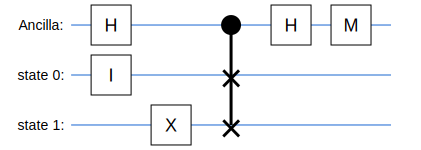

In [7]:
circuit.append(cirq.H(ancilla))     

circuit.append(cirq.CSWAP(ancilla, q0, q1))

circuit.append(cirq.H(ancilla))

circuit.append(cirq.measure(ancilla))



display(SVGCircuit(circuit))

#### 2.1.3: Run the circuit

- Run the circuit 1000 time using a simulator

In [8]:
simulator = cirq.Simulator()

result = simulator.run(circuit, repetitions=1000)

result

Ancilla=00011111011101011101101111111100100010001010000100011110011100001000110001100001111110010110001101110101101111010001111101110010010001100100101100111101110011000100101011001001101110100101011010001011111111011000111001101001010000010110110011101100100100101111011011011101000011011101001010100010001110111000100010010111010111001010110100010001111001101101000111010010100000111101100110010000100101111100010101001110100010000000110110101110000110001001101111101011101000101101011010000000110000101111111001101110010010001100010111110110110111000100110001011100101110010001110110001100110011010000111000100010011000111000101111011001111000100111111011011000101101011111101111011100000010000111011010101101110110111000101010111111011111010000000000110100011001111111000010111100101110101011101001010101100111010011000000011111110000011001001110100101110101101100000000011101100111000000001111111000101011000110100000111111110111010110110010101101001000010000111111111011110101010110010000001101

##### 2.1.4: Calculate the Fidelity

- Calculating fidelity using the equation : **Fidelity = 1 - 2 * prob(0)**

In [9]:
prob_0 = np.sum(result.measurements['Ancilla'])/len(result.measurements['Ancilla'])

fidelity = 1 - 2*prob_0

fidelity

-0.038000000000000034

### 2.2: Characterizing Noise with the Swap Test

#### Question: 2.2.1

- Calculating the fidelity of $q_0$ in our typical `Ideal` $|0\rangle$ state (meaning there is `no noise` ) and $q_1$ in a $|0\rangle$ state with 5% chance of depolarization. 

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


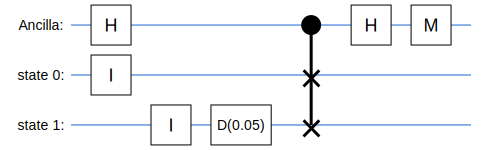

Ancilla=00000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000001000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000100000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000001000000000000000100000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000001000000000000000000100000000000000000000000000000000000000100000000000000000000100000000000000100000000000000000000000000000001000000000000000000000000000

In [10]:
# 1.1creating qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('Ancilla')

# 1.2.Prepare the qubit states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.I(q0))
circuit_1 = cirq.Circuit()
circuit_1.append(cirq.I(q1))


# change made here !!

noise = cirq.depolarize(0.05)
circuit = circuit_0 + circuit_1.with_noise(noise)

# change made upper!!


# 2.Append the swap test circuit.
circuit.append(cirq.H(ancilla))     

circuit.append(cirq.CSWAP(ancilla, q0, q1))

circuit.append(cirq.H(ancilla))

circuit.append(cirq.measure(ancilla))

display(SVGCircuit(circuit))


# 3.Run the circuit
simulator = cirq.Simulator()

result = simulator.run(circuit, repetitions=1000)

print(result)


# 4.Calculate the Fidelity

prob_0 = np.sum(result.measurements['Ancilla'])/len(result.measurements['Ancilla'])

fidelity = 1 - 2*prob_0


### Question: Check Fidelity for 0-100% and visualize

**Solve :**

In [11]:
depol_probabilities = []

for i in range(21):
    depol_probabilities.append(i*0.05)

depol_probabilities

[0.0,
 0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75,
 0.8,
 0.8500000000000001,
 0.9,
 0.9500000000000001,
 1.0]

In [12]:
fidelities = []


for prob in depol_probabilities:
    
    # 1.1creating qubits
    q0 = cirq.NamedQubit('state 0')
    q1 = cirq.NamedQubit('state 1')
    ancilla = cirq.NamedQubit('Ancilla')

    # 1.2.Prepare the qubit states
    circuit_0 = cirq.Circuit()
    circuit_0.append(cirq.I(q0))
    circuit_1 = cirq.Circuit()
    circuit_1.append(cirq.I(q1))


    # change made here !!

    noise = cirq.depolarize(prob)
    circuit = circuit_0 + circuit_1.with_noise(noise)

    # change made upper!!


    # 2.Append the swap test circuit.
    circuit.append(cirq.H(ancilla))     

    circuit.append(cirq.CSWAP(ancilla, q0, q1))

    circuit.append(cirq.H(ancilla))

    circuit.append(cirq.measure(ancilla))


    # 3.Run the circuit
    simulator = cirq.Simulator()

    result = simulator.run(circuit, repetitions=1000)


    # 4.Calculate the Fidelity

    prob_0 = np.sum(result.measurements['Ancilla'])/len(result.measurements['Ancilla'])

    fidelity = 1 - 2*prob_0
    
    fidelities.append(fidelity)

fidelities

[1.0,
 0.954,
 0.938,
 0.904,
 0.882,
 0.848,
 0.796,
 0.772,
 0.69,
 0.718,
 0.6779999999999999,
 0.6599999999999999,
 0.61,
 0.53,
 0.476,
 0.536,
 0.508,
 0.43999999999999995,
 0.368,
 0.388,
 0.32599999999999996]

**Result Vs Theoretical Prediction :**

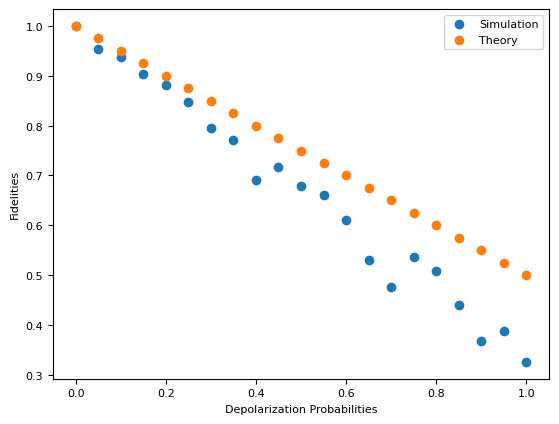

In [13]:
plt.scatter(depol_probabilities, fidelities, label = 'Simulation')

theoretical_fidelities =  [1 - prob/2 for prob in depol_probabilities]
plt.scatter(depol_probabilities, theoretical_fidelities, label='Theory')

plt.xlabel('Depolarization Probabilities')
plt.ylabel('Fidelities')

plt.legend()
plt.show()

### Discussion !!!

In this simulation, we explore the effect of depolarizing noise on the fidelity of a quantum state comparison using a swap test.

#### Key Components

1. **Depolarizing Noise**: 
   - The code introduces depolarizing noise with varying probabilities (from 0 to 1 in increments of 0.05) to a quantum circuit. 
   - Depolarizing noise transforms a qubit's state into a completely mixed state with a certain probability, which can degrade the quality of quantum computations.

2. **Swap Test Circuit**: 
   - The swap test is used to determine the overlap (or fidelity) between two quantum states. 
   - It involves using an ancilla qubit and applying Hadamard gates and a controlled swap (CSWAP) operation.

3. **Simulation**: 
   - The circuit is executed multiple times (1000 repetitions) using a simulator to gather statistical results.

4. **Fidelity Calculation**: 
   - The fidelity is calculated as  $F = 1 - 2p_0$, where $p_0$ is the probability of measuring the ancilla qubit in the state $|1\rangle$. 
   - This gives an indication of how similar the two quantum states are.

5. **Plotting**: 
   - The results are plotted against the theoretical expectation that the fidelity decreases linearly with the depolarizing probability, showing 
   
   - $F = 1 - \frac{\text{prob}}{2}$.

#### Results Discussion

- **Simulation vs. Theory**: 
  - The scatter plot shows two sets of data points: the simulated fidelities and the theoretical fidelities. 
  - Ideally, the simulation results should align closely with the theoretical values.

- **Trends**: 
  - As the depolarization probability increases, the fidelity decreases. 
  - This trend is expected because higher depolarization probabilities mean the states become more mixed, reducing their overlap.

- **Noise Impact**: 
  - The results highlight how sensitive quantum states are to noise. 
  - Even small amounts of depolarizing noise can significantly reduce the fidelity, which underscores the importance of error correction and mitigation in quantum computing.

- **Practical Implications**: 
  - Understanding the impact of noise is crucial for designing robust quantum algorithms and systems. 
  - The simulation provides insights into how real-world noise can affect quantum computations and the importance of accounting for such effects in practical implementations.

Overall, the code effectively demonstrates the relationship between depolarizing noise and fidelity in quantum state comparisons, providing both theoretical and simulated insights.
